## PROYECTO 8 

In [1]:
# Cargar todas las librerías
import pandas as pd

# CARGAR DATOS

In [2]:
taxi= pd.read_csv('moved_project_sql_result_01.csv')
chicago = pd.read_csv('moved_project_sql_result_04.csv')
DF =pd.read_csv('moved_project_sql_result_07.csv')

# EXPLORAR DATOS

In [3]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
chicago.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [10]:
taxi.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [11]:
chicago.sort_values(by='average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


## Análisis gráfico

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

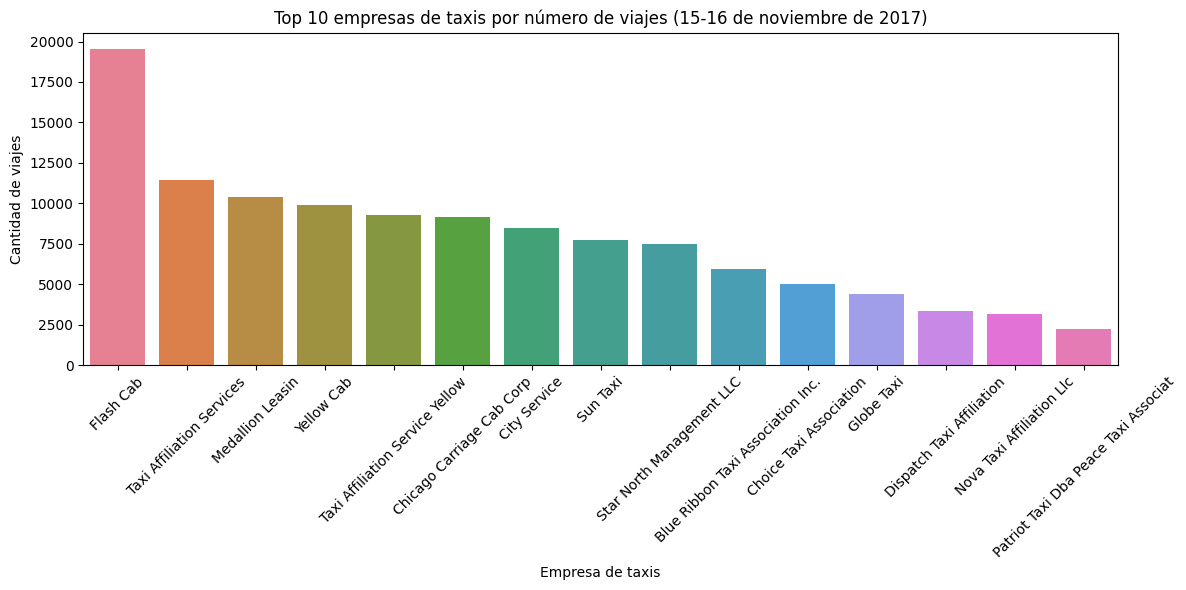

In [13]:
# Ordenamos y seleccionamos las 10 principales compañías
top_15 = taxi.sort_values(by='trips_amount', ascending=False).head(15)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_15, x='company_name', y='trips_amount', hue='company_name')  # Se mantiene hue para diferenciar las empresas
plt.title('Top 10 empresas de taxis por número de viajes (15-16 de noviembre de 2017)')
plt.xlabel('Empresa de taxis')
plt.ylabel('Cantidad de viajes')
plt.xticks(rotation=45)  # Opcional: inclina las etiquetas para que no se encimen
plt.tight_layout()
plt.show()


Las empresas que realizaron más viajes entre el 15 y 16 de noviembre de 2017 fueron Flash Cab (19,558 viajes), Taxi Affiliation Services y Medallion Leasing. Esto indica que estas compañías probablemente tienen una mayor flota, cobertura o preferencia entre los pasajeros, lo que las posiciona como líderes del sector en ese periodo.

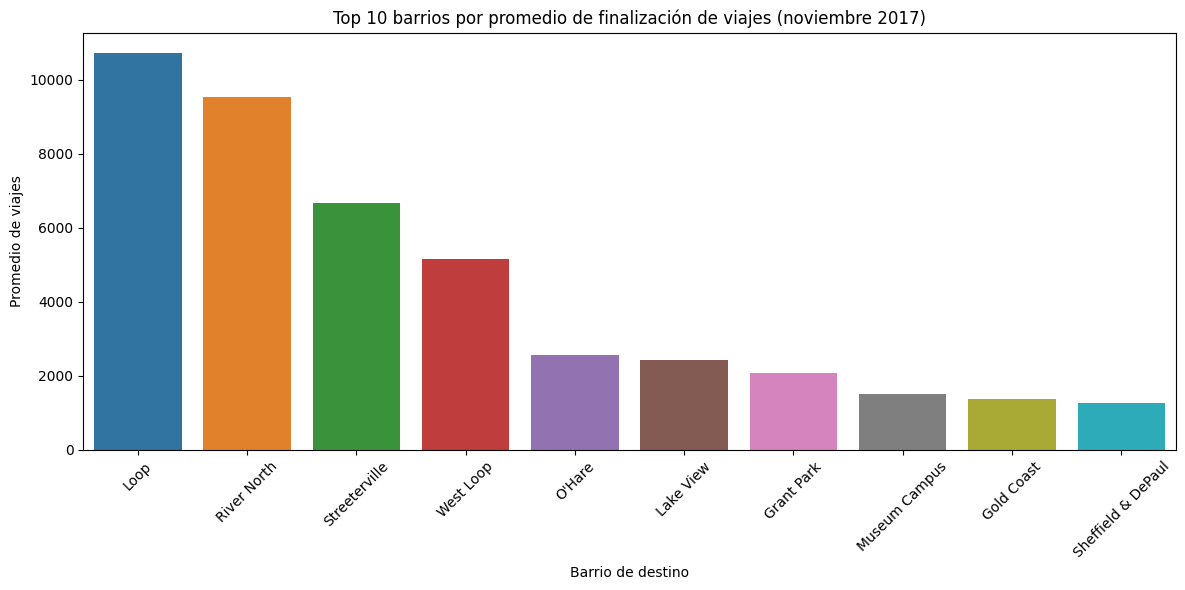

In [14]:
# Ordenar y seleccionar top 10
top10 = chicago.sort_values(by='average_trips', ascending=False).head(10)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='dropoff_location_name', y='average_trips', hue='dropoff_location_name')  # Se mantiene el hue
plt.title('Top 10 barrios por promedio de finalización de viajes (noviembre 2017)')
plt.xlabel('Barrio de destino')
plt.ylabel('Promedio de viajes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Los barrios con más finalizaciones de viajes en noviembre de 2017 fueron Loop, River North y Streeterville, siendo Loop el más destacado con más de 10,000 viajes en promedio. Estos barrios están en zonas céntricas y comerciales de Chicago, lo que sugiere una alta actividad económica, turística o de oficinas que incrementa la demanda de taxis.Los barrios con más finalizaciones de viajes en noviembre de 2017 fueron Loop, River North y Streeterville, siendo Loop el más destacado con más de 10,000 viajes en promedio. Estos barrios están en zonas céntricas y comerciales de Chicago, lo que sugiere una alta actividad económica, turística o de oficinas que incrementa la demanda de taxis.

## Prueba de hipótesis


 


Hipótesis nula (H₀): no hay diferencia en la duración promedio entre sábados lluviosos y no lluviosos.

Hipótesis alternativa (H₁): sí hay diferencia.

In [15]:
DF.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [16]:
import scipy.stats as stats

In [17]:
buen_clima = DF[DF['weather_conditions'] == 'Good']['duration_seconds']
mal_clima = DF[DF['weather_conditions'] == 'Bad']['duration_seconds']

results = stats.ttest_ind(buen_clima,mal_clima)


print(f"Valor p: {results.pvalue }")


alpha = 0.05
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: hay diferencia significativa en la duración de los viajes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa en la duración.")

Valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula: hay diferencia significativa en la duración de los viajes.


Como era de esperarse, la duración de los viajes se ve afectada por las condiciones climáticas. El valor p indica que hay una diferencia significativa entre los viajes en buen clima y mal clima, lo que nos lleva a rechazar la hipótesis nula. Esto sugiere que los días lluviosos o con tormenta incrementan la duración de los viajes.